Index([u'GAME_ID', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_CITY',
       u'PLAYER_ID', u'PLAYER_NAME', u'START_POSITION', u'COMMENT', u'MIN',
       u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA',
       u'FT_PCT', u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TO',
       u'PF', u'PTS', u'PLUS_MINUS'],
      dtype='object')
Eric Gordon
R Squared = 0.0554248111966
T Stat = 4.33320098771


Thaddeus Young
R Squared = 0.0573688355751
T Stat = 4.75175538284


Andrew Bogut
R Squared = 0.0544161433002
T Stat = -4.34460978904


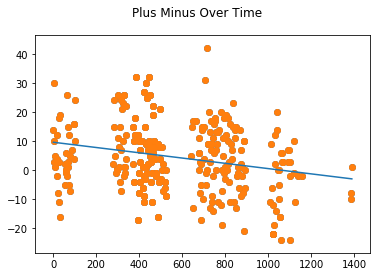

Joakim Noah
R Squared = 0.0515925907343
T Stat = -3.95127400762


Wesley Matthews
R Squared = 0.0526995069209
T Stat = -4.3554856149


Jason Smith
R Squared = 0.0632290976098
T Stat = 4.73381016092


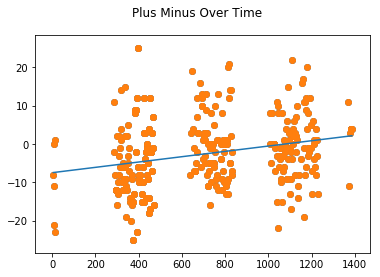

Lucas Nogueira
R Squared = 0.053281525116
T Stat = 2.66295096887


JaVale McGee
R Squared = 0.0933179097824
T Stat = 4.37533645232


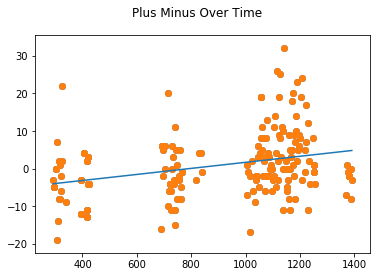

Mario Hezonja
R Squared = 0.0539534730731
T Stat = -3.18612973988


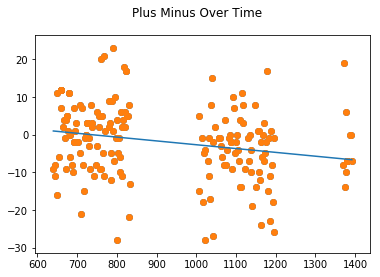

Pat Connaughton
R Squared = 0.151622722531
T Stat = 4.49393568773


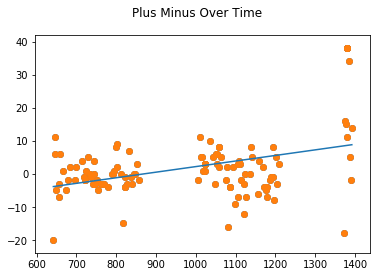

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.stats.api import ols
import statsmodels.api as sm
import numpy as np
import datetime as dt


def check_trend_plus_minus():
    
    bx = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
    print bx.columns
    list_of_player_ids=bx['PLAYER_ID'].unique()
    bx_info = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info.tsv',sep='\t')
    bx_info.drop_duplicates(inplace=True)
    bx_info['GAME_DATE_EST']=pd.to_datetime(bx_info['GAME_DATE_EST'])
    bx_info_cut = bx_info[['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON']]

    merge = bx.merge(bx_info_cut,how='inner',left_on='GAME_ID' , right_on='GAME_ID')
    
    for player_id in list_of_player_ids:
        try:
            merge_player = merge[merge['PLAYER_ID']==player_id]

            merge_player=merge_player[merge_player['PLUS_MINUS'].isnull()==False]

            X = (merge_player['GAME_DATE_EST']- dt.datetime(2014,1,1)).astype('timedelta64[D]')
            Y = merge_player['PLUS_MINUS']
            results = sm.OLS(Y,sm.add_constant(X)).fit()
            if (abs(results.tvalues[1]) > 2.5) and (len(X[X>1300])>0) and (len(X)>100) and (results.rsquared > 0.05):
                print merge_player['PLAYER_NAME'].iloc[0]
                print 'R Squared = ' + str(results.rsquared)
                print 'T Stat = ' + str(results.tvalues[1])
                plt.scatter(X,Y )

    #             print results.summary()

                plt.scatter(X,Y)
                plt.plot(X, X*results.params[1] + results.params[0])
                plt.suptitle('Plus Minus Over Time')
                plt.show()
        except :
            continue


def check_home_away():
    
    bx = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
    print bx.columns
    list_of_player_ids=bx['PLAYER_ID'].unique()
    bx_info = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info.tsv',sep='\t')
    bx_info.drop_duplicates(inplace=True)
    bx_info['GAME_DATE_EST']=pd.to_datetime(bx_info['GAME_DATE_EST'])
    bx_info_cut = bx_info[['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON']]
            


check_home_away()

In [5]:
[1717,101145,203109,203490]

player_id = 1717
bx = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
print bx.columns
list_of_player_ids=bx['PLAYER_ID'].unique()
bx_info = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info.tsv',sep='\t')
bx_info.drop_duplicates(inplace=True)
bx_info['GAME_DATE_EST']=pd.to_datetime(bx_info['GAME_DATE_EST'])
bx_info_cut = bx_info[['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON']]
merge = bx.merge(bx_info_cut,how='inner',left_on='GAME_ID' , right_on='GAME_ID')


merge[merge['MIN'].isnull==False]





Index([u'GAME_ID', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_CITY',
       u'PLAYER_ID', u'PLAYER_NAME', u'START_POSITION', u'COMMENT', u'MIN',
       u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA',
       u'FT_PCT', u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TO',
       u'PF', u'PTS', u'PLUS_MINUS'],
      dtype='object')


GAME_ID     TEAM_ID TEAM_ABBREVIATION   TEAM_CITY  PLAYER_ID  \
0       21300468  1610612742               DAL      Dallas       1890   
1       21300468  1610612742               DAL      Dallas       1717   
2       21300468  1610612742               DAL      Dallas       2223   
3       21300468  1610612742               DAL      Dallas     101145   
4       21300468  1610612742               DAL      Dallas     101181   
5       21300468  1610612742               DAL      Dallas       1713   
6       21300468  1610612742               DAL      Dallas     201148   
7       21300468  1610612742               DAL      Dallas     203109   
8       21300468  1610612742               DAL      Dallas     203499   
9       21300468  1610612742               DAL      Dallas     201971   
10      21300468  1610612742               DAL      Dallas     201961   
11      21300468  1610612742               DAL      Dallas     203108   
12      21300468  1610612742               DAL      Dallas     203539   
13      21300468  1610612764               WAS  Washington       2772   
14      21300468  1610612764               WAS  Washington     202344   
15      21300468  1610612764               WAS  Washington     101162   
16      21300468  1610612764               WAS  Washington     203078   
17      21300468  1610612764               WAS  Washington     202322   
18      21300468  1610612764               WAS  Washington     202338   
19      21300468  1610612764               WAS  Washington     101110   
20      21300468  1610612764               WAS  Washington     202066   
21      21300468  1610612764               WAS  Washington       2403   
22      21300468  1610612764               WAS  Washington     203490   
23      21300468  1610612764               WAS  Washington     201953   
24      21300468  1610612764               WAS  Washington     202698   
25      21300468  1610612764               WAS  Washington     202686   
26      21300469  1610612754               IND     Indiana     202331   
27      21300469  1610612754               IND     Indiana       2561   
28      21300469  1610612754               IND     Indiana     201579   
29      21300469  1610612754               IND     Indiana     202362   
...          ...         ...               ...         ...        ...   
164976  21700053  1610612757               POR    Portland    1628403   
164977  21700053  1610612757               POR    Portland     203894   
164978  21700053  1610612757               POR    Portland    1628380   
164979  21700053  1610612757               POR    Portland    1627774   
164980  21700054  1610612762               UTA        Utah     204060   
164981  21700054  1610612762               UTA        Utah     202324   
164982  21700054  1610612762               UTA        Utah     203497   
164983  21700054  1610612762               UTA        Utah    1628378   
164984  21700054  1610612762               UTA        Utah     201937   
164985  21700054  1610612762               UTA        Utah     202692   
164986  21700054  1610612762               UTA        Utah       2207   
164987  21700054  1610612762               UTA        Utah     200757   
164988  21700054  1610612762               UTA        Utah     203526   
164989  21700054  1610612762               UTA        Utah     202327   
164990  21700054  1610612762               UTA        Utah    1626220   
164991  21700054  1610612762               UTA        Utah     201973   
164992  21700054  1610612762               UTA        Utah    1628396   
164993  21700054  1610612746               LAC          LA     201568   
164994  21700054  1610612746               LAC          LA     201933   
164995  21700054  1610612746               LAC          LA     201599   
164996  21700054  1610612746               LAC          LA     203085   
164997  21700054  1610612746               LAC          LA     201976   
164998  21700054  1610612746               LAC          LA     1011

In [61]:

bx = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
print bx.columns
list_of_player_ids=bx['PLAYER_ID'].unique()
bx_info = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info_line_score.tsv',sep='\t')
bx_info.drop_duplicates(inplace=True)

bx_info_home_away = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info.tsv',sep='\t')
bx_info_home_away.drop_duplicates(inplace=True)

home= bx_info[['GAME_DATE_EST','GAME_ID','PTS','Win','TEAM_ID','TEAM_ABBREVIATION']].merge(bx_info_home_away[['GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID']],
                                                      how='inner',
                                                      left_on=['GAME_ID','TEAM_ID'],
                                                      right_on=['GAME_ID','HOME_TEAM_ID'])
away=  bx_info[['GAME_DATE_EST','GAME_ID','PTS','Win','TEAM_ID','TEAM_ABBREVIATION']].merge(bx_info_home_away[['GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID']],
                                                      how='inner',
                                                      left_on=['GAME_ID','TEAM_ID'],
                                                      right_on=['GAME_ID','VISITOR_TEAM_ID'])
appended = home.append(away)
print len(appended)


appended['GAME_DATE_EST']=pd.to_datetime(appended['GAME_DATE_EST'])
print appended[(appended['HOME_TEAM_ID']==appended['TEAM_ID'])].describe()[['Win','PTS']]
print appended[(appended['VISITOR_TEAM_ID']==appended['TEAM_ID'])].describe()[['Win','PTS']]

appended['GAME_DATE_EST'].max()

# merge = bx.merge(appended,how='inner',left_on='GAME_ID' , right_on='GAME_ID')
# merge['Min_Float'] = merge[merge['MIN'].isnull()==False]['MIN'].apply(lambda x: float(x.split(':')[0]))
# merge['Sec_Float'] = merge[merge['MIN'].isnull()==False]['MIN'].apply(lambda x: float(x.split(':')[1])/60)
# merge['Total_Minutes_Float'] = merge['Min_Float'] + merge['Sec_Float']    
# merge

# merge[merge['HOME_TEAM_ID']==merge['TEAM_ID']].columns


Index([u'GAME_ID', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_CITY',
       u'PLAYER_ID', u'PLAYER_NAME', u'START_POSITION', u'COMMENT', u'MIN',
       u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA',
       u'FT_PCT', u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TO',
       u'PF', u'PTS', u'PLUS_MINUS'],
      dtype='object')
646
              Win         PTS
count  323.000000  323.000000
mean     0.569659  102.092879
std      0.495892   11.973731
min      0.000000   72.000000
25%      0.000000   93.000000
50%      1.000000  102.000000
75%      1.000000  111.000000
max      1.000000  134.000000
              Win         PTS
count  323.000000  323.000000
mean     0.430341   99.049536
std      0.495892   12.200093
min      0.000000   66.000000
25%      0.000000   90.000000
50%      0.000000   99.000000
75%      1.000000  107.000000
max      1.000000  137.000000


Timestamp('2014-02-13 00:00:00')